# EDA

---

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random

pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('data/train-test/app_train.csv')

Utilizing the `pybaseball` library, we were able to acquire game log data of every game from 2015 to 2020, including playoffs. Our model utilizes selected features/columns to predict whether a certain pitch and the factors around it lead to a strike, or some other event. 

In this case, our target variable is aiming towards a "strike_attempt", where it can either be classified as a strike, a ball, an out, or on-base(ob). On-base can either be because the batter got a hit, or was walked to first base.

In [3]:
df['strike_attempt'].unique()

array(['strike', 'ball', 'ob', 'out'], dtype=object)

# Data Dictionary



---
Just note that there might be changes with the data as feature engineering and cleaning happened. This is the main gist of the data I worked with. The columns that get got dummified were the `pitch_name`,`Pitcher_name`, and `batter_name`. These were open to replacement. The `batter_id` might replace the `batter_name` and the `Pitcher_name` will be replaced by 17 columns representing the pitcher's use of pitches.

| column name 	| dtype 	| description 	|
|-	|-	|-	|
| game_date 	| datetime64[ns] 	| Date of the game 	|
| pitch_type 	| object 	| The type of pitch derived from Statcast 	|
| Pitcher_name 	| object 	| Name of the pitcher 	|
| pitcher_id 	| int 	| ID of the pitcher 	|
| batter_name 	| object 	| Name of the batter (Engineered Feature, fairly inaccurate)	|
| batter_id 	| int 	| ID of the batter 	|
| release_speed 	| float64 	| Pitch velocities from 2008-16 are via Pitch F/X, and adjusted to roughly out-of-hand release point. All velocities from 2017 and beyond are Statcast, which are reported out-of-hand. 	|
| release_pos_x 	| float64 	| Horizontal Release Position of the ball measured in feet from the catcher's perspective 	|
| release_pos_z 	| float64 	| Vertical Release Position of the ball measured in feet from the catcher's perspective 	|
| stand 	| uint8 	| Side of the plate batter is standing. (R = 1, L = 0) 	|
| p_throws 	| uint8 	| Hand pitcher throws with. (R = 1, L = 0) 	|
| balls 	| float64 	| Pre-pitch number of balls in count. 	|
| strikes 	| float64 	| Pre-pitch number of strikes in count. 	|
| pfx_x 	| float64 	| Horizontal movement in feet from the catcher's perspective. 	|
| pfx_z 	| float64 	| Vertical movement in feet from the catcher's perpsective. 	|
| plate_x 	| float64 	| Horizontal position of the ball when it crosses home plate from the catcher's perspective. 	|
| plate_z 	| float64 	| Vertical position of the ball when it crosses home plate from the catcher's perspective. 	|
| on_3b 	| int 	| Pre-pitch MLB Player Id of Runner on 3B. 	|
| on_2b 	| int 	| Pre-pitch MLB Player Id of Runner on 2B. 	|
| on_1b 	| int 	| Pre-pitch MLB Player Id of Runner on 1B. 	|
| inning 	| int 	| Pre-pitch inning number.  	|
| inning_topbot 	| uint8 	| Pre-pitch top or bottom of inning. (Bottom = 0, Top = 1) 	|
| effective_speed 	| float64 	| Derived speed based on the the extension of the pitcher's release. 	|
| release_spin_rate 	| float64 	| Spin rate of pitch tracked by Statcast. 	|
| release_extension 	| float64 	| Release extension of pitch in feet as tracked by Statcast. 	|
| Catcher 	| int 	| MLB Player Id for catcher. 	|
| FirstBasemen 	| int 	| MLB Player Id for 1B. 	|
| SecondBasemen 	| int 	| MLB Player Id for 2B. 	|
| ThirdBasemen 	| int 	| MLB Player Id for 3B. 	|
| ShortStop 	| int 	| MLB Player Id for SS. 	|
| LeftField 	| int 	| MLB Player Id for LF. 	|
| CenterField 	| int 	| MLB Player Id for CF. 	|
| RightField 	| int 	| MLB Player Id for RF. 	|
| at_bat_number 	| int 	| Plate appearance number of the game. 	|
| pitch_number 	| int 	| Total pitch number of the plate appearance. 	|
| pitch_name 	| object 	| The name of the pitch derived from the Statcast Data. 	|
| bat_score 	| int 	| Pre-pitch bat team score 	|
| fld_score 	| int 	| Pre-pitch field team score 	|
| post_bat_score 	| int 	| Post-pitch bat team score 	(Person who recorded this did not do it correctly)|
| post_fld_score 	| int 	| Post-pitch field team score 	(Person who recorded this did not do it correctly)|
| if_fielding_alignment 	| object 	| Infield fielding alignment at the time of the pitch. 	|
| of_fielding_alignment 	| object 	| Outfield fielding alignment at the time of the pitch. 	|
| count 	| object 	| Shows the pre-pitch count in a nicer format. 	|
| strike_attempt 	| object 	| (Y) The result of what happened to the pitch: strike, out, ball, or on-base(ob). 	|
| events 	| object 	| Event of the resulting Plate Appearance. 	|
| description 	| object 	| Description of the resulting pitch. 	|
| type 	| object 	| Short hand of pitch result. B = ball, S = strike, X = in play. 	|
| bb_type 	| object 	| Batted ball type, ground_ball, line_drive, fly_ball, popup. 	|
| vx0 	| float64 	| The velocity of the pitch, in feet per second, in x-dimension, determined at y=50 feet. 	|
| vy0 	| float64 	| The velocity of the pitch, in feet per second, in y-dimension, determined at y=50 feet. 	|
| vz0 	| float64 	| The velocity of the pitch, in feet per second, in z-dimension, determined at y=50 feet. 	|
| ax 	| float64 	| The acceleration of the pitch, in feet per second per second, in x-dimension, determined at y=50 feet. 	|
| ay 	| float64 	| The acceleration of the pitch, in feet per second per second, in y-dimension, determined at y=50 feet. 	|
| az 	| float64 	| The acceleration of the pitch, in feet per second per second, in z-dimension, determined at y=50 feet. 	|
| outs_when_up 	| int 	| Pre-pitch number of outs. 	|

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3925778 entries, 0 to 3925777
Data columns (total 55 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   game_date              object 
 1   pitch_type             object 
 2   Pitcher_name           object 
 3   pitcher_id             int64  
 4   batter_name            object 
 5   batter_id              int64  
 6   release_speed          float64
 7   release_pos_x          float64
 8   release_pos_z          float64
 9   stand                  int64  
 10  p_throws               int64  
 11  balls                  int64  
 12  strikes                int64  
 13  pfx_x                  float64
 14  pfx_z                  float64
 15  plate_x                float64
 16  plate_z                float64
 17  on_3b                  int64  
 18  on_2b                  int64  
 19  on_1b                  int64  
 20  inning                 int64  
 21  inning_topbot          int64  
 22  effective_speed   

In [5]:
df.describe(include='all')

,game_date,pitch_type,Pitcher_name,pitcher_id,batter_name,batter_id,release_speed,release_pos_x,release_pos_z,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,effective_speed,release_spin_rate,release_extension,Catcher,FirstBasemen,SecondBasemen,ThirdBasemen,ShortStop,LeftField,CenterField,RightField,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,count,strike_attempt,events,description,type,bb_type,vx0,vy0,vz0,ax,ay,az,outs_when_up
count,3925778,3925778,3925778,3.925778e+06,3925778,3.925778e+06,3.910973e+06,3.902532e+06,3.902532e+06,3.925778e+06,3.925778e+06,3.925778e+06,3.925778e+06,3.913604e+06,3.913604e+06,3.913604e+06,3.913604e+06,3.925778e+06,3.925778e+06,3.925778e+06,3.925778e+06,3.925778e+06,3.885487e+06,3.766037e+06,3.883811e+06,3.925778e+06,3.925778e+06,3.925778e+06,3.925778e+06,3.925778e+06,3.925778e+06,3.925778e+06,3.925778e+06,3.925778e+06,3.925778e+06,3925778,3.925778e+06,3.925778e+06,3.925778e+06,3.925778e+06,3925778,3925778,3925778,3925778,1008313,3925778,3925778,694203,3.913604e+06,3.913604e+06,3.913604e+06,3.913604e+06,3.913604e+06,3.913604e+06,3.925778e+06
unique,1114,11,1674,NaN,2567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,NaN,NaN,NaN,4,5,14,4,35,19,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-09-04,FF,Max Scherzer,NaN,J.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-Seam Fastball,NaN,NaN,NaN,NaN,Standard,Standard,0-0,strike,field_out,ball,S,ground_ball,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5640,1388429,18341,NaN,25957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1388429,NaN,NaN,NaN,NaN,2838462,3571565,1009010,1804613,401696,1317497,1804682,314059,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,5.403311e+05,NaN,5.347084e+05,8.868567e+01,-7.793901e-01,5.919715e+00,5.813979e-01,7.294465e-01,8.842978e-01,8.876961e-01,-1.928299e-01,7.733834e-01,1.884104e-02,2.279551e+00,5.051610e+04,9.879194e+04,1.619614e+05,4.998506e+00,5.092058e-01,8.819325e+01,2.211626e+03,6.038816e+00,5.165356e+05,5.142169e+05,5.445410e+05,5.395915e+05,5.568228e+05,5.343705e+05,5.481872e+05,5.326239e+05,3.908339e+01,2.904070e+00,NaN,2.291132e+00,2.331207e+00,2.291209e+00,2.331207e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.288409e+00,-1.288765e+02,-4.357640e+00,-2.352538e+00,2.632440e+01,-2.296656e+01,9.812009e-01
std,NaN,NaN,NaN,7.830241e+04,NaN,8.158190e+04,6.025909e+00,2.015019e+01,3.368651e+01,4.933300e-01,4.442458e-01,9.672773e-01,8.257246e-01,1.021488e+00,1.013376e+00,2.048049e+01,3.217943e+01,1.585875e+05,2.106543e+05,2.495596e+05,2.666002e+00,4.999153e-01,6.576435e+00,3.349139e+02,5.147727e-01,7.962577e+04,7.851485e+04,7.847754e+04,9.531888e+04,7.987036e+04,9.523073e+04,7.822602e+04,8.938566e+04,2.311444e+01,1.731435e+00,NaN,2.589246e+00,2.676471e+00,2.589280e+00,2.676471e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.983404e+00,8.730541e+00,3.076268e+00,1.063525e+01,4.081825e+00,8.880890e+00,8.177113e-01
min,NaN,NaN,NaN,1.125260e+05,NaN,1.125260e+05,3.610000e+01,-2.521450e+04,-3.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.013900e+03,-1.600000e+01,-2.642677e+04,-2.848000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.130000e+02,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.718084e+01,-7.721720e+02,-7.512015e+01,-1.279061e+02,-8.386989e+01,-1.843371e+02,0.000000e+00
25%,NaN,NaN,NaN,4.771320e+05,NaN,4.621010e+05,8.460000e+01,-2.130000e+00,5.630000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,3.000000e-01,-5.800000e-01,1.640000e+00,

In order to understand the data, prior to modeling, we have to look at what the data possibly looks like.

In [6]:
df.head()

,game_date,pitch_type,Pitcher_name,pitcher_id,batter_name,batter_id,release_speed,release_pos_x,release_pos_z,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,effective_speed,release_spin_rate,release_extension,Catcher,FirstBasemen,SecondBasemen,ThirdBasemen,ShortStop,LeftField,CenterField,RightField,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,count,strike_attempt,events,description,type,bb_type,vx0,vy0,vz0,ax,ay,az,outs_when_up
0,2015-11-01,FF,Wade Davis,451584,Wilmer Flores,527038,96.1,-1.92,5.95,1,1,1,2,-0.27,1.70,-0.93,1.62,0,624424,0,12,0,95.4,2463.0,6.4,460077,543333,450314,519058,444876,460086,456715,449181,94,6,4-Seam Fastball,2,7,2,7,Standard,Strategic,1-2,strike,strikeout,called_strike,S,NaN,3.075,-139.609,-9.724,-2.028,34.780,-11.706,2
1,2015-11-01,FC,Wade Davis,451584,Wilmer Flores,527038,93.1,-1.50,6.02,1,1,1,2,0.24,0.72,0.78,1.55,0,624424,0,12,0,92.2,2705.0,5.9,460077,543333,450314,519058,444876,460086,456715,449181,94,5,Cutter,2,7,2,7,Standard,Strategic,1-2,strike,NaN,foul,S,NaN,5.156,-135.442,-7.227,5.004,28.835,-25.323,2
2,2015-11-01,FF,Wade Davis,451584,Wilmer Flores,527038,97.0,-1.37,6.08,1,1,1,2,-0.50,1.41,1.32,2.47,0,624424,0,12,0,96.4,2362.0,6.3,460077,543333,450314,519058,444876,460086,456715,449181,94,4,4-Seam Fastball,2,7,2,7,Standard,Strategic,1-2,strike,NaN,foul,S,NaN,8.459,-140.843,-7.313,-5.412,31.551,-15.189,2
3,2015-11-01,FC,Wade Davis,451584,Wilmer Flores,527038,93.6,-1.25,6.06,1,1,0,2,0.32,0.80,2.92,2.23,0,0,624424,12,0,92.8,2724.0,6.0,460077,543333,450314,519058,444876,460086,456715,449181,94,3,Cutter,2,7,2,7,Strategic,Strategic,0-2,ball,NaN,ball,B,NaN,10.094,-135.734,-5.821,6.079,26.355,-24.250,2
4,2015-11-01,FF,Wade Davis,451584,Wilmer Flores,527038,97.1,-1.49,6.08,1,1,0,1,-0.76,1.63,0.26,2.74,0,0,624424,12,0,96.0,2401.0,6.1,460077,543333,450314,519058,444876,460086,456715,449181,94,2,4-Seam Fastball,2,7,2,7,Strategic,Standard,0-1,strike,NaN,foul,S,NaN,6.519,-140.993,-7.138,-9.148,32.251,-11.956,2


# Null Check

---
Let's look at the nulls from what I have cleaned up, so far. Most of the stuff is cleaned in a different csv file. However, this is prior to that.

In [7]:
df.isnull().sum()

game_date                      0
pitch_type                     0
Pitcher_name                   0
pitcher_id                     0
batter_name                    0
batter_id                      0
release_speed              14805
release_pos_x              23246
release_pos_z              23246
stand                          0
p_throws                       0
balls                          0
strikes                        0
pfx_x                      12174
pfx_z                      12174
plate_x                    12174
plate_z                    12174
on_3b                          0
on_2b                          0
on_1b                          0
inning                         0
inning_topbot                  0
effective_speed            40291
release_spin_rate         159741
release_extension          41967
Catcher                        0
FirstBasemen                   0
SecondBasemen                  0
ThirdBasemen                   0
ShortStop                      0
LeftField 

# The Many Types of Pitches

---
In order to understand what is a strike, we must look at the different types of pitches out there, or at least in this data.

In [8]:
df['pitch_name'].value_counts(normalize=True)

4-Seam Fastball     0.353670
Slider              0.161244
Changeup            0.104666
2-Seam Fastball     0.102200
Sinker              0.089903
Curveball           0.082651
Cutter              0.056347
Knuckle Curve       0.024601
Split-Finger        0.015163
Unknown             0.004377
Knuckleball         0.002923
Intentional Ball    0.001628
Eephus              0.000221
Forkball            0.000216
Pitch Out           0.000160
Screwball           0.000029
Fastball            0.000003
Name: pitch_name, dtype: float64

I am not surprised that the 4-seam fastball is the pitch that is most often thrown. The idea of being able to throw a pitch very fast is one of the few traits a pitcher needs to have in order to make in the big leagues. 

In [9]:
# View the Small Anomoly
df[df['pitch_name']=='Fastball']

,game_date,pitch_type,Pitcher_name,pitcher_id,batter_name,batter_id,release_speed,release_pos_x,release_pos_z,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,effective_speed,release_spin_rate,release_extension,Catcher,FirstBasemen,SecondBasemen,ThirdBasemen,ShortStop,LeftField,CenterField,RightField,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,count,strike_attempt,events,description,type,bb_type,vx0,vy0,vz0,ax,ay,az,outs_when_up
398463,2015-06-26,U,Johnny Cueto,456501,Noah Syndergaard,592789,92.0,-1.37,5.98,0,1,1,2,-0.88,1.42,0.93,3.72,0,0,0,3,0,89.9,2229.0,5.7,430910,458015,408252,453943,553993,458689,571740,457803,20,4,Fastball,1,1,1,1,Standard,Standard,1-2,ball,NaN,ball,B,NaN,7.879000,-133.727000,-2.674000,-9.644000,33.346000,-16.998000,0
398579,2015-06-26,U,Trevor Rosenthal,572096,Anthony Rizzo,519203,89.5,-0.56,5.84,0,1,1,2,-1.76,1.37,-0.72,1.28,0,0,0,9,1,88.7,1512.0,5.7,425877,448602,543939,572761,425509,545341,445055,518792,70,4,Fastball,2,2,2,2,Standard,Standard,1-2,strike,NaN,foul,S,NaN,3.496000,-130.021000,-8.114000,-19.895000,28.610000,-18.183000,1
398878,2015-06-26,U,Bruce Rondon,541652,Adam LaRoche,425560,88.7,-1.69,5.83,0,1,0,0,-1.69,0.71,-1.13,1.89,0,0,0,8,1,88.0,1946.0,6.0,592407,408234,435079,592206,578428,493316,434658,502110,63,1,Fastball,4,4,4,4,Infield shift,Strategic,0-0,ball,NaN,ball,B,NaN,5.137000,-128.989000,-4.920000,-18.928000,25.689000,-26.125000,1
461897,2015-06-10,U,Jose Quintana,500779,Evan Gattis,594828,89.1,2.27,5.85,1,0,0,1,0.85,1.04,0.89,2.50,514888,605512,0,1,1,89.4,1404.0,6.9,434567,547989,466988,543216,493596,466320,543776,541645,4,2,Fastball,0,0,0,0,Standard,Standard,0-1,strike,NaN,foul,S,NaN,-5.825000,-129.550000,-4.160000,11.819000,30.464000,-22.249000,1
480631,2015-06-05,U,Aaron Sanchez,592717,Jonathan Villar,542340,92.1,-1.24,5.97,0,1,1,2,-1.58,0.66,-0.07,2.42,0,0,0,9,1,91.5,2240.0,6.5,431145,475253,572365,518626,408314,485567,607680,430832,63,4,Fastball,1,6,1,6,Standard,Standard,1-2,ob,single,hit_into_play_no_out,X,line_drive,6.628000,-134.036000,-4.353000,-18.695000,32.132000,-26.329000,0
572356,2015-05-12,U,Lance Lynn,458681,Jason Kipnis,543401,89.3,-1.92,5.68,0,1,0,0,-0.72,1.04,-0.68,2.61,0,0,0,1,0,89.5,2243.0,5.6,425877,571431,543939,572761,425509,407812,488721,518792,4,1,Fastball,0,0,0,0,Standard,Standard,0-0,strike,NaN,called_strike,S,NaN,4.663000,-129.965000,-3.804000,-7.467000,19.052000,-21.717000,0
605709,2015-05-04,U,Carlos Martinez,593372,Anthony Rizzo,519203,88.0,-0.34,6.09,0,1,2,2,-1.34,1.01,-1.17,2.19,0,451594,458085,1,1,86.5,2103.0,5.4,488810,448602,543939,572761,425509,407812,445055,518792,3,6,Fastball,0,0,0,0,Standard,Standard,2-2,out,field_out,hit_into_play,X,fly_ball,0.669808,-127.934795,-5.281346,-14.425934,26.653169,-20.645613,0
647010,2015-04-23,U,Chris Sale,519242,Eric Hosmer,543333,89.5,2.47,5.24,0,0,0,1,1.65,0.63,1.03,2.40,0,0,0,3,1,88.7,1974.0,6.4,452095,547989,608672,543216,493351,466320,594809,541645,19,2,Fastball,2,0,2,0,Standard,Standard,0-1,ob,single,hit_into_play_no_out,X,ground_ball,-7.865000,-130.150000,-1.920000,21.415000,33.233000,-27.042000,2
647068,2015-04-23,U,Chris Sale,519242,Alex Gordon,460086,89.5,2.40,4.95,0,0,1,1,1.43,0.71,-0.87,1.63,0,543333,434778,1,1,87.6,1988.0,6.1,452095,547989,608672,543216,493351,466320,594809,541645,6,3,Fastball,2,0,2,0,Strategic,Standard,1-1,strike,NaN,swinging_strike,S,NaN,-11.928000,-129.828000,-3.238000,18.558000,34.709000,-26.227000,1
667089,2015-04-18,U,Anibal Sanchez,434671,Conor Gillaspie,543216,89.3,0.06,6.05,0,1,1,1,0.14,0.99,0.07,2.71,0,0,0,3,1,89.1,2550.0,6.0,543510,408234,435079,541650,578428,493316,434658,502110,23,3,Fastball,4,1,4,1,Infield shift,Standard,1-1,strike,NaN,foul,S,NaN,-0.613000,-129.981000,-4.288000,3.367000,22.055000,-22.532000,2


Looking at the fact that the pitchers are actually recognized pitchers by MLB standards, I am surprised they couldn't specify what Fastball was thrown by these pitchers. I assumed that the people who threw these "unidentified" fastballs were position players pitching in a blowout game or Chris Davis from the Baltimore Orioles. If you don't know who he is, he is probably one of the worst hitters in baseball right now but he did have an immaculate pitching relief which lead their team to a victory. Or Russell Martin for his stint with the Dodgers in 2019. Examples of position players pitching [here](https://www.youtube.com/watch?v=0tL3JDgwmF8). This is Chris Davis actually winning as a pitcher [here](https://www.youtube.com/watch?v=H7hXOxrozxM&t=18s).

In [10]:
df[df['pitch_name']=='Screwball']

,game_date,pitch_type,Pitcher_name,pitcher_id,batter_name,batter_id,release_speed,release_pos_x,release_pos_z,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,effective_speed,release_spin_rate,release_extension,Catcher,FirstBasemen,SecondBasemen,ThirdBasemen,ShortStop,LeftField,CenterField,RightField,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,count,strike_attempt,events,description,type,bb_type,vx0,vy0,vz0,ax,ay,az,outs_when_up
152328,2015-08-31,U,Hector Santiago,502327,Billy Burns,542993,78.6,2.90,5.87,1,0,0,0,1.44,0.99,0.66,3.11,0,0,0,1,0,76.5,1921.0,4.9,455104,405395,502205,592230,430947,425664,545361,594777,8,1,Screwball,0,1,0,1,Standard,Standard,0-0,strike,NaN,swinging_strike,S,NaN,-8.385000,-114.249000,-0.750000,14.999000,20.468000,-24.790000,0
254965,2015-08-05,U,Hector Santiago,502327,Carlos Santana,467793,79.2,3.34,5.85,1,0,0,2,1.08,0.62,2.53,2.72,608070,0,0,1,1,77.2,1671.0,5.2,455104,543068,543213,543216,430947,461815,545361,594777,4,3,Screwball,0,0,0,0,Standard,Standard,0-2,ball,NaN,ball,B,NaN,-4.408000,-115.232000,-0.930000,11.647000,22.129000,-28.155000,2
296837,2015-07-25,U,Hector Santiago,502327,Shin-Soo Choo,425783,83.2,2.53,5.62,0,0,1,0,0.19,0.45,-1.65,0.97,0,0,0,4,1,81.3,2149.0,5.3,455104,405395,543213,543216,430947,605323,545361,594777,33,2,Screwball,1,4,1,4,Infield shift,Standard,1-0,ball,NaN,ball,B,NaN,-10.681000,-120.535000,-4.922000,3.399000,21.990000,-29.563000,2
368286,2015-07-04,U,Hector Santiago,502327,Mitch Moreland,519048,82.3,3.08,5.62,0,0,2,2,0.34,0.50,-0.12,2.21,0,596059,134181,1,0,81.2,2214.0,5.4,455104,405395,543213,501896,430947,543706,545361,594777,9,6,Screwball,0,0,0,0,Strategic,Standard,2-2,strike,NaN,foul,S,NaN,-8.638000,-119.467000,-2.013000,4.944000,18.992000,-29.006000,2
435008,2015-06-17,U,Hector Santiago,502327,Nick Ahmed,605113,80.1,2.58,5.70,1,0,0,0,1.37,0.64,-0.57,1.30,0,0,0,4,0,78.6,1780.0,5.4,455104,405395,543213,501896,430947,459964,545361,594777,31,1,Screwball,3,0,3,0,Standard,Standard,0-0,ball,NaN,ball,B,NaN,-10.428000,-116.105000,-4.017000,14.732000,21.424000,-27.898000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715826,2018-05-16,U,Hector Santiago,502327,David Freese,501896,78.3,2.23,5.75,1,0,1,2,1.40,0.20,0.64,2.06,0,0,621559,1,0,77.0,1967.0,5.4,553882,547989,660162,571602,570560,547170,641553,544725,8,4,Screwball,0,0,0,0,Standard,Standard,1-2,out,grounded_into_double_play,hit_into_play,X,ground_ball,-5.893011,-113.772377,-1.504811,13.216223,20.109432,-30.161137,1
2735951,2018-05-11,U,Hector Santiago,502327,Kyle Schwarber,656941,78.7,2.16,6.02,0,0,1,1,1.30,1.10,0.56,3.85,0,592178,519203,2,0,76.9,1845.0,5.3,456078,547989,570560,571602,641313,547170,544725,594953,20,3,Screwball,5,0,5,0,Strategic,Standard,1-1,ball,NaN,ball,B,NaN,-5.726104,-114.201358,0.220863,12.274392,22.344252,-23.292840,2
2801153,2018-04-24,U,Hector Santiago,502327,Nelson Cruz,443558,77.7,2.56,5.56,1,0,0,1,1.40,0.60,-0.86,1.61,0,0,0,6,1,75.8,2316.0,5.4,456078,547989,660162,570560,641313,544725,641553,572204,42,2,Screwball,1,0,1,0,Infield shift,Strategic,0-1,ball,NaN,ball,B,NaN,-9.653832,-112.449324,-2.484785,13.548895,22.158218,-26.782083,2
2801163,2018-04-24,U,Hector Santiago,502327,Jean Segura,516416,78.2,2.72,5.69,1,0,0,2,1.10,0.60,1.24,2.28,0,0,0,6,1,77.2,1835.0,5.5,456078,547989,660162,570560,641313,544725,641553,572204,40,3,Screwball,1,0,1,0,Standard,Standard,0-2,strike,NaN,foul,S,NaN,-5.103891,-113.688504,-1.543935,10.366223,19.800242,-27.139528,0


In [11]:
pitcher_att = df.groupby(['Pitcher_name','pitch_name']).size()/df.groupby(['Pitcher_name']).size()
pitcher_att_df = pd.DataFrame(pitcher_att)

pitcher_att_df.rename(columns={0:'pitch_usage'}, inplace=True)

In [12]:
pitcher_att_df

pitch_usage
Pitcher_name pitch_name                   
A.J. Achter  2-Seam Fastball      0.124372
             4-Seam Fastball      0.327889
             Changeup             0.353015
             Cutter               0.071608
             Intentional Ball     0.006281
...                                    ...
Zack Wheeler Curveball            0.107809
             Sinker               0.029371
             Slider               0.192006
             Split-Finger         0.042962
             Unknown              0.000691

[9415 rows x 1 columns]

The dataframe above is the entire list of pitchers (or position players) that have pitched between 2015-2020. This data shows how often a pitcher used a particular pitch out of all the pitches that they have thrown. This also helps us understand what is in the pitch repertoir of a particular pitcher and create a unique identifier of a pitcher without having to dummify or utilize the ID. For example, we will look at Clayton Kershaw's repertoir.

In [13]:
pitcher_att_df.loc['Clayton Kershaw']

,pitch_usage
pitch_name,
2-Seam Fastball,0.011581
4-Seam Fastball,0.459906
Changeup,0.004632
Curveball,0.166260
Intentional Ball,0.000313
Slider,0.345415
Unknown,0.011894


Kershaw utilizes a lot of 4-seam fastballs in his mix of pitches. However, what seems to be particularly high is his use of the slider and the curveball. These are his most popular off-speed pitches. This is his style, his way of pitching. He will have you think about his fast ball a lot of the time and then boom when the count is in the Kershaw's favor, he will get you out with an off-speed. This is probably different from his fellow teammate, and closer, Kenley Jansen. Kenley is reliant on his cutter to go fast and cut into the inside of a batter if they are lefty, or outside and away from a right-handed batter. The lateral movement of a cutter is what makes that particular fastball very devestating. Look [here](https://www.youtube.com/watch?v=dMVXjRGTtG0) for more information about cutters versus fastballs.

In [14]:
pitcher_att_df.loc['Kenley Jansen']

,pitch_usage
pitch_name,
4-Seam Fastball,0.047995
Cutter,0.752778
Intentional Ball,0.002255
Pitch Out,0.000161
Sinker,0.081495
Slider,0.108713
Unknown,0.006603


In [15]:
# We update what the pitcher_att_df looks like
pitcher_att_df=pitcher_att_df.reset_index().pivot(index='Pitcher_name', columns='pitch_name', values='pitch_usage').fillna(0).reset_index()

In [16]:
pitcher_att_df.head()

pitch_name,Pitcher_name,2-Seam Fastball,4-Seam Fastball,Changeup,Curveball,Cutter,Eephus,Fastball,Forkball,Intentional Ball,Knuckle Curve,Knuckleball,Pitch Out,Screwball,Sinker,Slider,Split-Finger,Unknown
0,A.J. Achter,0.124372,0.327889,0.353015,0.000000,0.071608,0.0,0.0,0.0,0.006281,0.0000,0.0,0.001256,0.0,0.0000,0.115578,0.0,0.000000
1,A.J. Burnett,0.000000,0.116800,0.087600,0.000000,0.000000,0.0,0.0,0.0,0.003200,0.2924,0.0,0.000400,0.0,0.4992,0.000000,0.0,0.000400
2,A.J. Cole,0.099433,0.367989,0.057224,0.128612,0.011331,0.0,0.0,0.0,0.001416,0.0000,0.0,0.000283,0.0,0.0000,0.330595,0.0,0.003116
3,A.J. Griffin,0.004431,0.535303,0.100739,0.233087,0.022157,0.0,0.0,0.0,0.001182,0.0000,0.0,0.000591,0.0,0.0000,0.102216,0.0,0.000295
4,A.J. Minter,0.000414,0.445319,0.091964,0.000000,0.451118,0.0,0.0,0.0,0.000000,0.0000,0.0,0.000000,0.0,0.0000,0.000414,0.0,0.010771


In [17]:
len(pitcher_att_df.columns[1:])

17

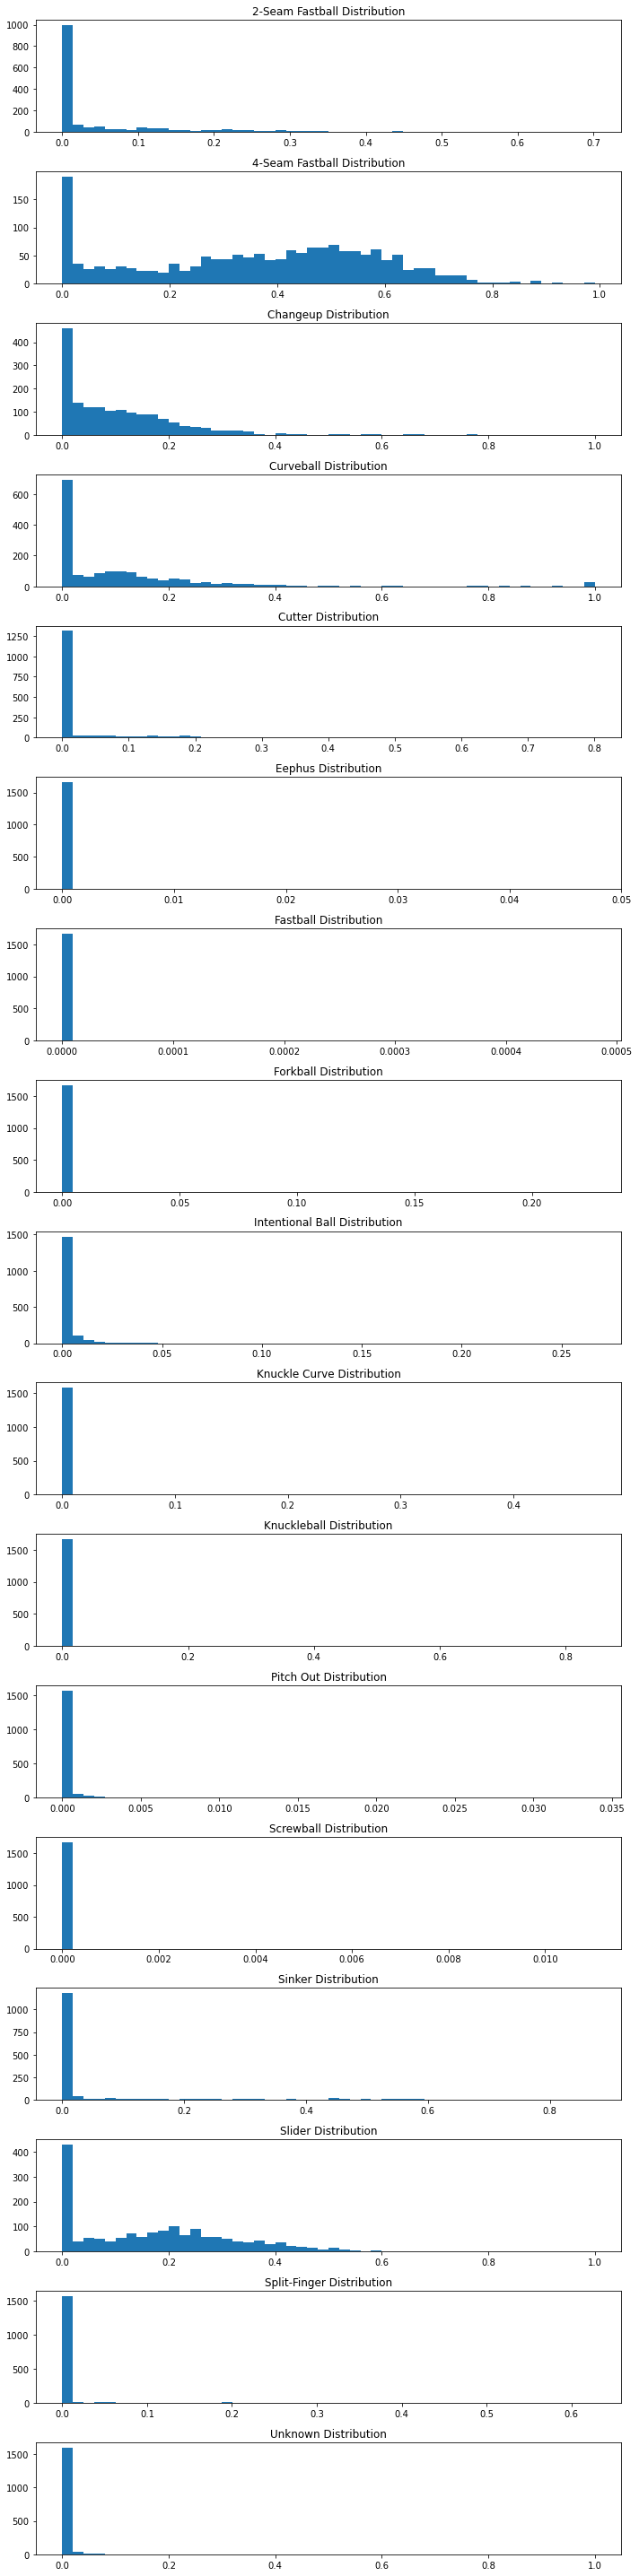

In [18]:
fig, axs = plt.subplots(nrows=len(pitcher_att_df.columns[1:]), tight_layout=True)
fig.set_figheight(40)
fig.set_figwidth(10)

count = 0
for col in pitcher_att_df.columns[1:]:
    axs[count].hist(pitcher_att_df[col], bins=50)
    axs[count].title.set_text(f'{col} Distribution')
    count += 1

The slider and the 4-seam fastball are the most used overall just by looking at the distribution of pitches. This includes relief pitchers who don't stay on the mound for very long or position players who never expect to be on the mound. The change up is growing in steady users but that shows that the pitching rotation for most teams involve having to rely on the 4-seam to eat up innings and more than likely induce fly balls or grounders.

In [19]:
df.groupby('pitch_name').agg({'release_speed': ['mean', 'count', 'min', 'max']})
# Thank you Sid for this code from the group project

release_speed                      
                          mean    count   min    max
pitch_name                                          
2-Seam Fastball      92.537845   401214  63.6  102.5
4-Seam Fastball      93.257928  1388429  50.6  105.7
Changeup             84.246183   410894  46.3   97.8
Curveball            78.211310   324468  38.1   98.0
Cutter               88.528837   221204  48.0  101.4
Eephus               67.100923      867  46.7   84.2
Fastball             89.700000       10  88.0   92.1
Forkball             86.499764      848  78.5   91.9
Intentional Ball     73.212269     6390  45.4   92.7
Knuckle Curve        80.836908    96577  56.9   91.6
Knuckleball          76.083635    11476  50.7   83.2
Pitch Out            86.907302      630  52.2   98.0
Screwball            78.646018      113  71.9   83.2
Sinker               92.014507   352940  70.3  105.0
Slider               84.641159   633008  45.1   99.6
Split-Finger         85.026801    59527  72.2   96.3
Unknown              84.933305     2378  36.1  102.0

# UnQualified Pitchers

---
Since I talked about position players as pitchers, I decided to determine how many of these pitchers are actually qualified. To be considered a qualified pitcher. To be qualified, they have to have thrown at least 100 pitches.

In [20]:
s = df.groupby('Pitcher_name').agg({'Pitcher_name': ['count']}) 
# Use as a filter to get all "pitcher" who pitched less than 100
unqualified_pitchers = list(s[s['Pitcher_name']['count'] < 100].index)
# Look at strikes, who throws more strikes, who takes more strikes, etc.

In [21]:
random.choice(unqualified_pitchers)

'Leury Garcia'

In [22]:
len(unqualified_pitchers)

267

In over 6 seasons, there have been a total of 267 "pitchers" that threw for less than 100 pitches on the mound. This might be due to a new pitcher being able to play a small portion of their career in the majors and not continuing to play in the majors, or the fact that they are a position player tossing the ball so their team can save the rest of their REAL pitchers for future games. A good example of a "position pitcher is 'Eduardo Escobar'.

# Righties vs Lefties

--- 
One of the more important things about baseball, that makes it stand out compared to other sports, is whether or not you are a right hander or lefty. In other sports like basketball or football, it doesn't matter which hand you are dominant in so long as you are an athletically capable player to play the position. In soccer/futbol, you have to be good with you feet. I am sure in all sports the goal is to try and be ambidextrous. However, in baseball, that is a completely different story.

Sometimes there is more value if you are one side versus the other.

Let's look at some stats.

In [23]:
# Every single at bat and which stance batters majority take.
df['stand'].value_counts(normalize=True)

1    0.581398
0    0.418602
Name: stand, dtype: float64

In [24]:
df['p_throws'].value_counts(normalize=True)

1    0.729446
0    0.270554
Name: p_throws, dtype: float64

Majority of MLB at-bats are right handed and there is almost an even split of of lefties and righties on the mound. However this does not take into account Switch Hitters.

Most batters from 2015-2020 are right hand batters, as well as right-handed pitchers. This makes lefties fairly valuable in the MLB.

In [25]:
df.drop_duplicates(subset='batter_id')['stand'].value_counts(normalize=True)

1    0.647745
0    0.352255
Name: stand, dtype: float64

In [26]:
df.drop_duplicates(subset='Pitcher_name')['p_throws'].value_counts(normalize=True)

1    0.737157
0    0.262843
Name: p_throws, dtype: float64

In [27]:
df['batter_id'].sample()

1015229    429664
Name: batter_id, dtype: int64

In [28]:
# Switch Hitters are anomolies
count = 0
for batter in df['batter_id'].unique():
    if len(df[df['batter_id']==batter]['stand'].unique()) == 2:
        count += 1

In [29]:
count / len(df['batter_id'].unique()), count

(0.08869741510390268, 175)

In [30]:
# Javier Baez is actually a right handed batter but was recognized as a switch hitter due to 2020 shenanigans
df[df['batter_id']==595879]['stand'].unique()

array([1, 0], dtype=int64)

There are 175 switch-hitters (174, most likely) from 2015-2020 because [Javier Baez is having too much fun](https://www.youtube.com/watch?v=XyYIiE_2LTA) and possibly other if they were in this situation.

---
## Now who's better.

Just by looking at the graphs, they look the same, just shown on a different scale. That is to be expected as there are far more righties than lefties in the professional baseball game.

In [31]:
df.groupby('stand').size()

stand
0    1643339
1    2282439
dtype: int64

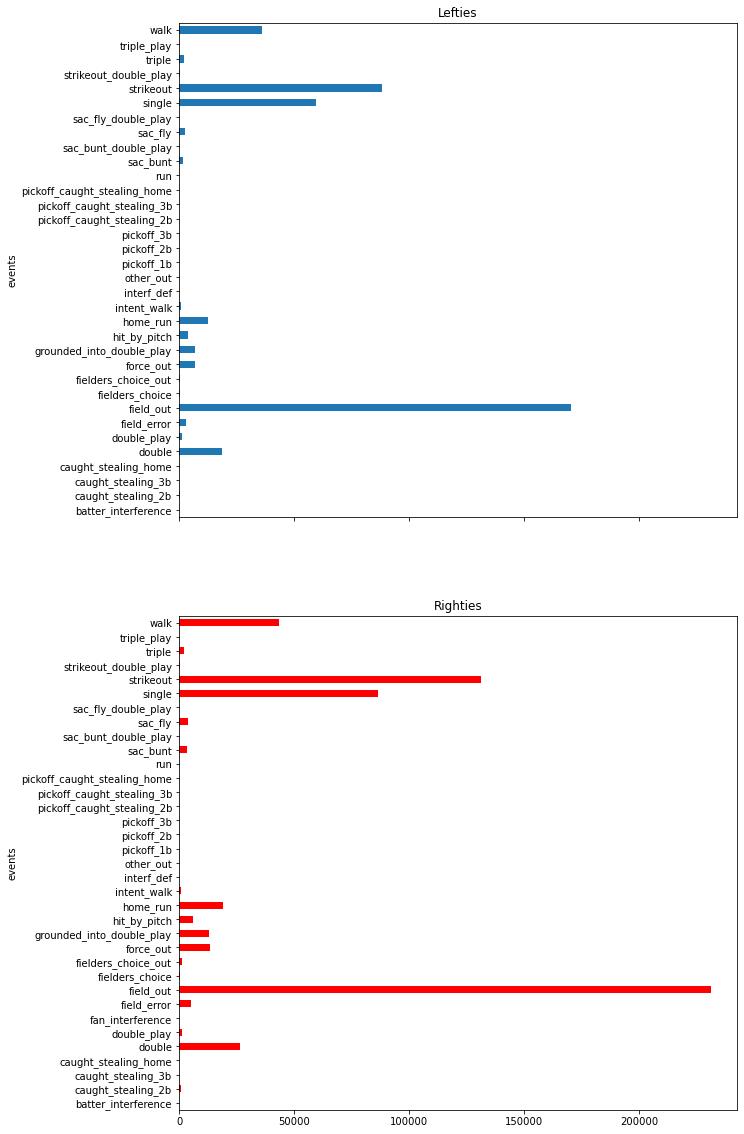

In [32]:
fig, axs = plt.subplots(figsize=(10,20),nrows=2, sharex='all')

df.groupby(['stand','events']).size()[0].plot(ax=axs[0], kind='barh', title='Lefties')
df.groupby(['stand','events']).size()[1].plot(ax=axs[1], kind='barh', title='Righties', color='red');

Some other statistics regarding lefties and righties:

# Sometimes it doesn't need to go over the fence.

--- 
I want to see if there is a way to view the score change caused by the batting team. I select most common ways of getting on base and comparing them to each other.

It's kind of obvious to note that most ways to get on base is by the way of the single, what surprises me is that the number of homeruns scored from 2015 to 2020 is 75% of the size of "doubles". I didn't think that doubles were easier to come by over the homer.

In [68]:
df[((df['events']=='single') | 
   (df['events']=='walk') |
   (df['events']=='double') |
   (df['events']=='home_run') |
   (df['events']=='triple') |
   (df['events']=='sac_fly') |
   (df['events']=='sac_bunt') |
   (df['events']=='hit_by_pitch') |
   (df['events']=='intent_walk')) ].strike_attempt.value_counts()

ob      243987
ball     79358
out       6830
Name: strike_attempt, dtype: int64

In [69]:
df[((df['events']=='single') | 
   (df['events']=='walk') |
   (df['events']=='double') |
   (df['events']=='home_run') |
   (df['events']=='triple') |
   (df['events']=='sac_fly') |
   (df['events']=='sac_bunt') |
   (df['events']=='hit_by_pitch') |
   (df['events']=='intent_walk')) ].events.value_counts()

single          146058
walk             79358
double           45158
home_run         31880
hit_by_pitch      9920
sac_fly           6408
sac_bunt          4944
triple            4526
intent_walk       1923
Name: events, dtype: int64

In [70]:
df[((df['events']=='single') | 
   (df['events']=='walk') |
   (df['events']=='double') |
   (df['events']=='home_run') |
   (df['events']=='triple') |
   (df['events']=='sac_fly') |
   (df['events']=='sac_bunt') |
   (df['events']=='hit_by_pitch') |
   (df['events']=='intent_walk')) ].description.value_counts()

hit_into_play_no_out            150292
hit_into_play_score              81852
ball                             72774
hit_by_pitch                      9920
hit_into_play                     6829
blocked_ball                      6584
intent_ball                       1923
pitchout_hit_into_play_score         1
Name: description, dtype: int64

Since I used the `description` instead of `events` to engineer my `strike_attempt` column, this value counts is showing the imperfections of my mapping. It seems that balls and walks are the same amount but in actuality I didn't account for events such as the intentional walk in the data, it must all fall under 'ob', or on-base.

Since I was entirely focused on the batter versus pitcher match-up. I wanted to know if the batter would get himself out or his actions would cause a strike, regardless of the change in the score or not.

Looking at this, however is that even though you may have been thrown out or something of the sort, there was a small possibility that a particular batter's out can still lead to a score for the batter's team.

# The StrikeZone

---
A strike zone is built based on teh catcher's framing ability, the umpire's view, the batter's stance, and the pitcher's pitch.
A more formal term is "the volume of space which a ball must pass through to be called a ‘strike’ (if the batter doesn’t swing)"[[source]](https://www.dimensions.com/element/strike-zone).There are lots of ways of building a strike zone. Every game, and sometimes, every batter has a particular strike zone for them against a certain pitcher. There are times when maybe a pitcher has a different strike zone because of the umpire in the back.

Let's try and build out what the strike zone is, based on the catcher's point of view

In [93]:
# This was computed in another notebook
# The average strike_zone top and bottom according to baseball savants standards
sz_bot, sz_top = 1.5788433014700127, 3.425786431130287
sz_top

3.425786431130287

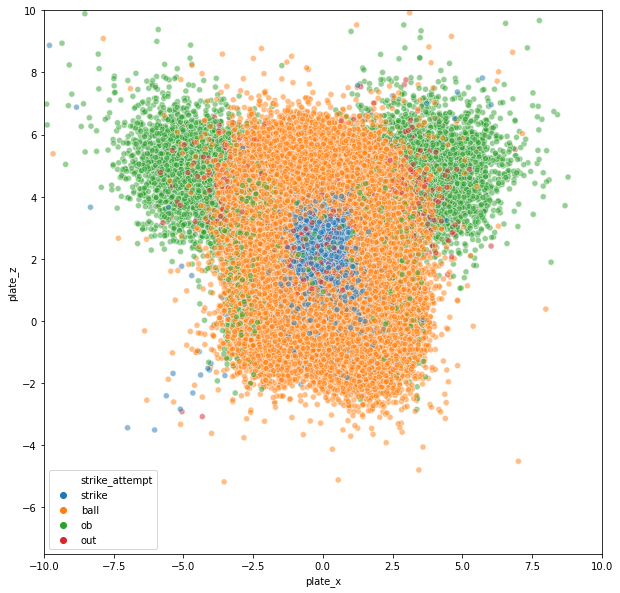

In [105]:
plt.figure(figsize=(10,10))
plt.xlim(-10,10)
plt.ylim(-7.5,10)
sns.scatterplot(data=df, x='plate_x', y='plate_z', hue='strike_attempt', alpha=.5);
# df.plot(kind='scatter', x='plate_x', y='plate_z', figsize=(12,10), s=10)

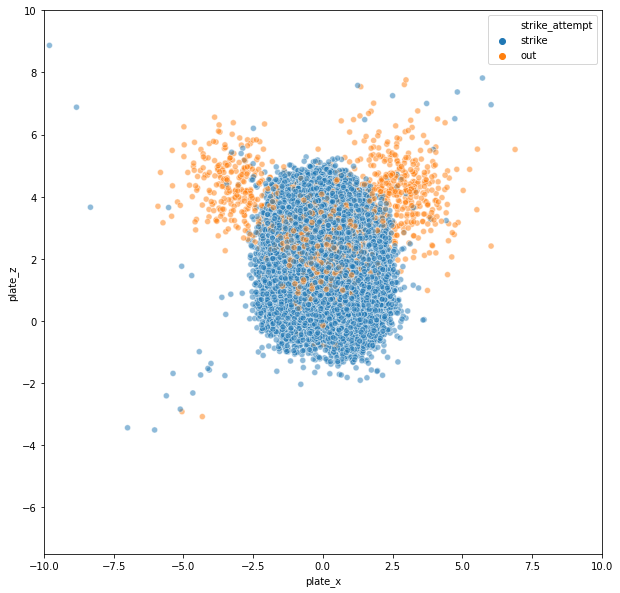

In [107]:
plt.figure(figsize=(10,10))
plt.xlim(-10,10)
plt.ylim(-7.5,10)
sns.scatterplot(data=df[(df.strike_attempt=='strike') | (df.strike_attempt=='out')], # selected data
                x='plate_x', y='plate_z', hue='strike_attempt', alpha=.5);

It appears the strike zone is pretty consistent, the outlier points are most likely due to a batter fouling of a pitch that was clearly out of the strike zone (blue) or they struck out completely (orange dots outside of the blue looking egg). There may be a few called strikes but it is not easy to catch here. Although it safe to say that the strike zone is not the shape of rectangle, it looks more like an egg really. This is in due part to umpires making a borderline call.

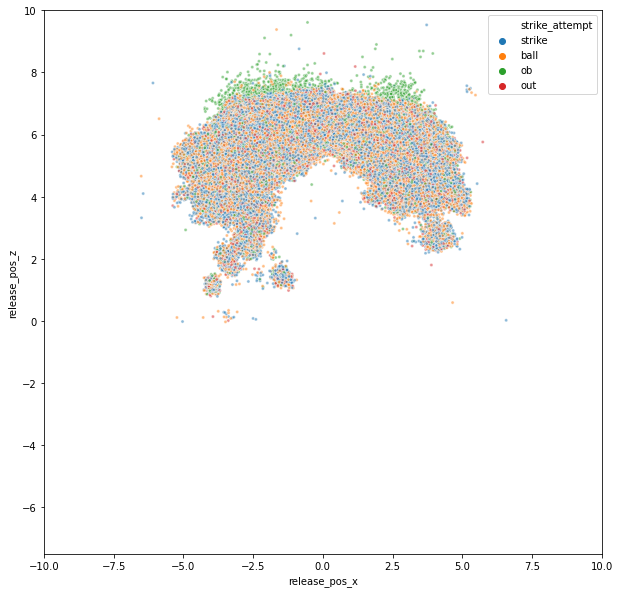

In [128]:
plt.figure(figsize=(10,10))
plt.xlim(-10,10)
plt.ylim(-7.5,10)
sns.scatterplot(data=df, # selected data
                x='release_pos_x', y='release_pos_z', s=10, hue='strike_attempt', alpha=.5);

# Pitcher's Capabilties

---
In order to determine a phenomonal pitch, we must understand the way a pitcher pitches. We will look at the relationships of spin rates, release speeds, release locations, and possibly how much the movement of a baseball affects the target for ball and strike.

Sometimes determining where the pitcher releases the ball influences a strike or ball. Every pitcher is different so their throwing styles are different.

1=right, 0=left

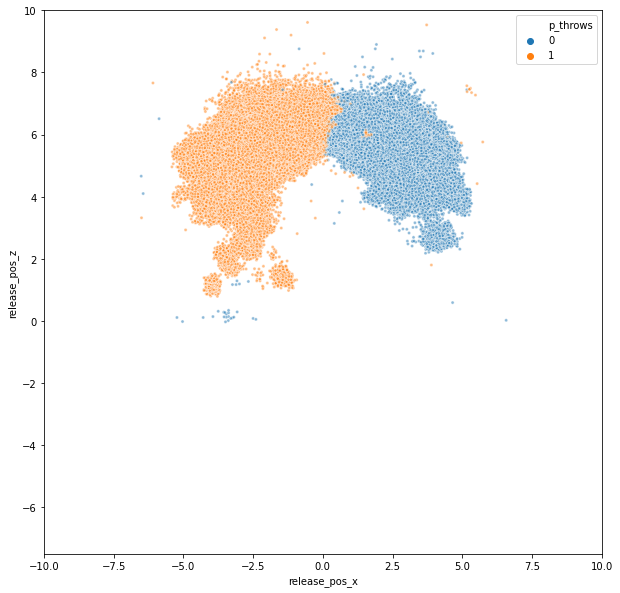

In [110]:
plt.figure(figsize=(10,10))
plt.xlim(-10,10)
plt.ylim(-7.5,10)
sns.scatterplot(data=df, # selected data
                x='release_pos_x', y='release_pos_z', s=10, hue='p_throws', alpha=.5);

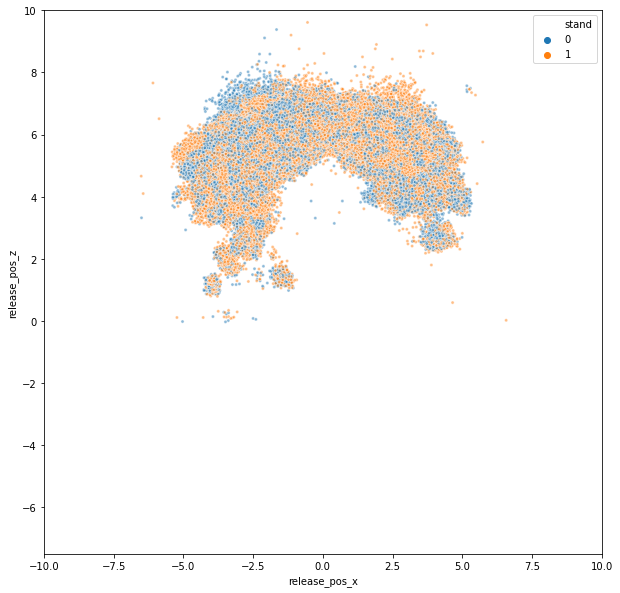

In [111]:
plt.figure(figsize=(10,10))
plt.xlim(-10,10)
plt.ylim(-7.5,10)
sns.scatterplot(data=df, # selected data
                x='release_pos_x', y='release_pos_z', s=10, hue='stand', alpha=.5);

If we were looking at the pitchers head, we would see most right hand releases come from the left side of a person and vice versa for a lefty pitcher. The second plot emphasizes that sometimes we aim for the pitching match-up where you want a right handed pitcher against the righty batter and the same goes for lefty vs lefty. In the first graph, there may be some overlap of righties normally in the lefty position and vice versa, this may be due to recording the data wrong, outliers, or some pitchers have such a weird wind up they just have weird release points.

That would explain why a lot of managers are always following the sabermetrics, or in this case, baseball instincts. 

Let's see what pitches are popular for lefties vs righties. 

In [116]:
df.groupby(['p_throws','pitch_name']).size()/df.groupby('p_throws').size()

p_throws  pitch_name      
0         2-Seam Fastball     0.100857
          4-Seam Fastball     0.341718
          Changeup            0.129827
          Curveball           0.085736
          Cutter              0.058480
          Eephus              0.000052
          Fastball            0.000003
          Intentional Ball    0.001601
          Knuckle Curve       0.019685
          Knuckleball         0.000069
          Pitch Out           0.000036
          Screwball           0.000106
          Sinker              0.108265
          Slider              0.144376
          Split-Finger        0.005203
          Unknown             0.003984
1         2-Seam Fastball     0.102698
          4-Seam Fastball     0.358103
          Changeup            0.095333
          Curveball           0.081506
          Cutter              0.055555
          Eephus              0.000284
          Fastball            0.000002
          Forkball            0.000296
          Intentional Ball    0.00163

**Things to Note:**

- Righties tend to throw more fastballs that their other-hand counter parts.
- Lefties rely on more southpaw style pitching where the change-up is more prominent in their repertoir.
- Righties throw more sliders, while lefties throw more sinkers
    - This is in part to righties not having much spin already in their throws, so they at the very least maintain the speed while adding more drop movement in order to get the swing in miss. With lefties, they already have a lot of curve to their throws so throwing it any slower could be very bad. The slider takes into account the lack of speed lefties possibly have compared to righties and add more horizontal movement.
- The fact that lefties have a pitchout, must be due to the fact that they are facing first base, and if there is a runner on first base, they need to ensure that the runner doesn't try to steal. 
    - If a runner tried to steal second on a lefty, there are special pitchouts in order to get the ball faster to first base or the catcher to "gun them down".

In [124]:
# The differences between speeds and spin rates as well as velocities and accelerations
df.groupby('p_throws').agg({'release_speed': ['mean','min', 'max'],
                            'effective_speed': ['mean','min', 'max'],
                            'release_spin_rate': ['mean','min', 'max'],
                            'vy0': ['mean','min', 'max'],
                            'ay': ['mean','min', 'max']})

release_speed              effective_speed              \
                  mean   min    max            mean  min    max   
p_throws                                                          
0            87.710339  41.0  105.7       87.076116  0.0  105.9   
1            89.047599  36.1  105.0       88.608063  0.0  194.6   

         release_spin_rate                        vy0                         \
                      mean    min     max        mean         min        max   
p_throws                                                                       
0              2174.276079  419.0  3726.0 -127.426510 -153.362000 -57.883435   
1              2225.665956  413.0  3741.0 -129.414322 -772.171994 -49.735272   

                 ay                        
               mean        min        max  
p_throws                                   
0         25.885488   4.513007  49.266000  
1         26.487206 -83.869886  89.491679

Besides Max speeds being broken by the left handers in `release_speed`, right handers pretty much dominate lefties in terms of speed. They lead by 2 in average `release_speed`, by about 1 in `effective_speed`, about 50 rotations in `release_spin_rate`, and in velocity and acceleration.

I think the only reason why the max is higher in release speeds for lefties over righties are Aroldis Chapman and Garret Crochet who are becoming some hard throwing lefty relievers in the MLB. Both are in the Yankees organization right now. (Just an assumption). [Click here to see how fast Chapman can throw](https://www.youtube.com/watch?v=Qem3mypA2JI). For a right hander, I can think of [Jordan Hicks](https://www.youtube.com/watch?v=-Z0rhiIv2vw) who threw at 105 mph.

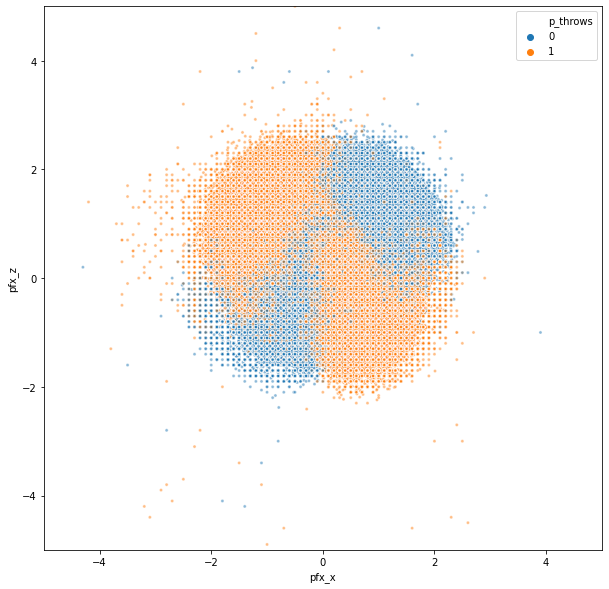

In [127]:
plt.figure(figsize=(10,10))
plt.xlim(-5,5)
plt.ylim(-5,5)
sns.scatterplot(data=df, # selected data
                x='pfx_x', y='pfx_z', s=10, hue='p_throws', alpha=.5);
# The catcher's point of view is really interesting

C:\Users\ncesm\anaconda3\envs\capstone\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


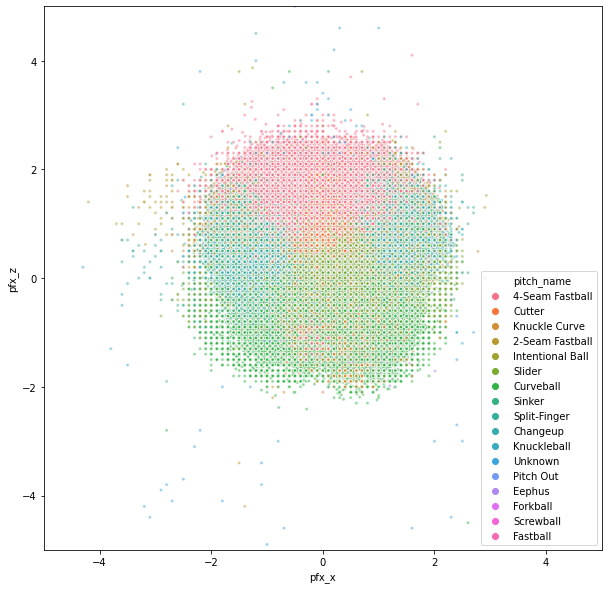

In [129]:
plt.figure(figsize=(10,10))
plt.xlim(-5,5)
plt.ylim(-5,5)
sns.scatterplot(data=df, # selected data
                x='pfx_x', y='pfx_z', s=10, hue='pitch_name', alpha=.5);
# The catcher's point of view is really interesting

It's subtle and very difficult to see, but a lot of the off speed pitches are at the bottom while all the fastball/speed pitches are up top.

# Let's Track the movement of a random pitch

In [227]:
random_pitch = df.sample(1)
random_pitch

,game_date,pitch_type,Pitcher_name,pitcher_id,batter_name,batter_id,release_speed,release_pos_x,release_pos_z,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,inning,inning_topbot,effective_speed,release_spin_rate,release_extension,Catcher,FirstBasemen,SecondBasemen,ThirdBasemen,ShortStop,LeftField,CenterField,RightField,at_bat_number,pitch_number,pitch_name,bat_score,fld_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,count,strike_attempt,events,description,type,bb_type,vx0,vy0,vz0,ax,ay,az,outs_when_up
2019921,2017-05-11,FF,Martin Perez,527048,Wil Myers,571976,95.1,1.55,5.66,1,0,0,0,1.1,1.3,-1.54,1.48,0,0,0,3,1,93.8,2215.0,5.8,518960,607387,596059,518902,462101,592261,460576,425783,19,1,4-Seam Fastball,1,0,1,0,Standard,Standard,0-0,ball,NaN,ball,B,NaN,-10.354248,-137.567483,-8.027487,16.167211,29.873414,-14.165958,2


In [221]:
random_pitch['release_pos_x']

447202   -2.23
Name: release_pos_x, dtype: float64

In [167]:
from mpl_toolkits.mplot3d import axes3d
import plotly.graph_objects as go

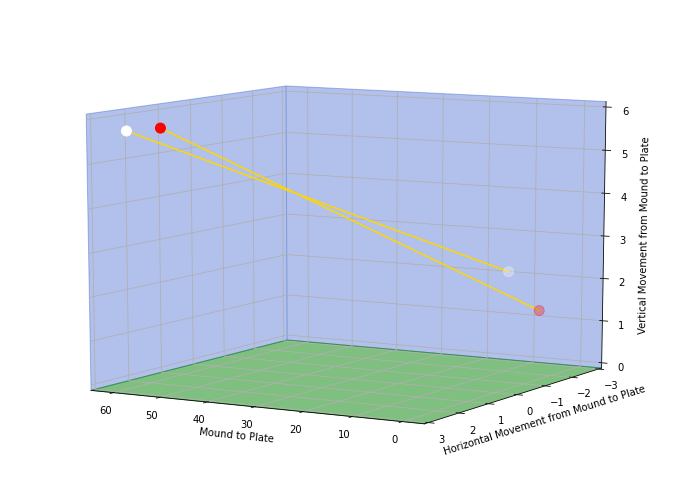

In [235]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes(projection="3d")

# The first coordinate is the pitcher starting and the second will be where the catcher or plate receives it
# The point comes from random pitch

# Steven Matx vs Cody Bellinger: Strike
start_xaxis = [60.5, 0] # Distance from pitcher to the plate
start_yaxis = [2.56,-0.42] # Horizontal movement
start_zaxis = [5.71,2.56] # Vertical Movement

# Martin Perez vs Wil Myers: Ball
ball_x = [60.5,0]
ball_y = [1.55,-1.54]
ball_z = [5.66, 1.48]

# Lines or movement estimation, assume everything is a moving fastball
ax.plot3D(start_xaxis, start_yaxis, start_zaxis, c='gold') # Strike pitch, sinker
ax.plot3D(ball_x, ball_y, ball_z, c='gold') # Ball, 4-seam

# Titles
ax.set_xlabel('Mound to Plate')
ax.set_ylabel('Horizontal Movement from Mound to Plate')
ax.set_zlabel('Vertical Movement from Mound to Plate')

# Plots for the "baseball"
ax.scatter(start_xaxis, start_yaxis, start_zaxis, s=100, c='white')
ax.scatter(ball_x, ball_y, ball_z, s=100, c='red')

# Color for panes
ax.zaxis.set_pane_color((0,.5,0,.5))
ax.yaxis.set_pane_color((0,0.2,.75,.3))
ax.xaxis.set_pane_color((0,0.2,.75,.3))

# Limits
ax.set_ylim3d(-3,3)
ax.set_zlim3d(0,6)

# How to Turn it if I need to
ax.view_init(10, 120)
plt.show();
# https://papaprogrammer.com/3d-plots-with-python-and-matplotlib/

In [194]:
# Credit:https://plotly.com/python/3d-axes/ and professor Devin
fig = go.Figure(data=[go.Scatter3d(
                        x=[60.5, 0],
                        y=[2.56,-0.42],
                        z=[5.71,2.56])
                     ]
               )


fig.update_layout(
    scene = dict(
        xaxis = dict(nticks=4, range=[0,70],),
                     yaxis = dict(nticks=1, range=[-1,4],),
                     zaxis = dict(nticks=1, range=[0,6],),),
    width=700,
    margin=dict(r=20, l=10, b=10, t=10))

fig.show()

# Outs, Strikes, Walks, aren't they all the same?